Мы владеем сетью магазинов, в которых продаются различные товары. Наши сотрудники собрали датасет из 8523 продаж товаров в различных магазинах нашей сети. Наша задача построить модель, предсказывающую продажи каждого продукта в конкретном магазине. Используя эту модель, попробовать выявить факторы, больше всего влияющие на увеличение продаж. Описание датасета:


Variable
Description
Item_Identifier
Id продукта
Item_Weight
Вес продукта
Item_Fat_Content
Содержание жира в продукте
Item_Visibility
%полок, отведенный под наш продукт в конкретном магазине
Item_Type
Категория продукта
Item_MRP
Максимальная цена продажи продукта
Outlet_Identifier
Идентификатор магазина
Outlet_Establishment_Year
Год открытия магазина
Outlet_Size
Площадь магазина
Outlet_Location_Type
Тип города, в котором расположен магазин
Outlet_Type
Признак является ли магазин продуктовым или супермаркетом
Item_Outlet_Sales
Продажи продукта в конкретном магазине. Именно ее и надо предсказывать

В результате работы должен получиться:
− Jupyter-ноутбук с моделью
- Признаки, влияющие больше всего на уровень продаж
− Датасет, если после ваших манипуляций он отличается от исходного;
− Документ с обоснованием решения и краткими результатами: какие техники и почему использовали, что получили, что можно улучшить (можно в рамках jupyter notebook’а)


In [107]:
import pandas as pd
import numpy as np

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

загружаем данные

In [109]:
data=pd.read_csv('data.csv')


In [110]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


Два признака содержат пропуски

пропущенные показатели веса буду обнулять. Это поможет выделить данные и перевести в числовой вид.

In [112]:
data['Item_Weight'].fillna(0,inplace=True)
#data['Item_Weight'].fillna(-1000,inplace=True)

пропущенные характерисики размера обозначу в отдельную категорию

In [113]:
data['Outlet_Size'].fillna("Nein",inplace=True)

проверяем полноту данных

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


ок

In [115]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Nein,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


поочередно проверил кол уникальных значений по всем категориальным признакам. Здесь приведен только один пример

In [116]:
data.groupby('Outlet_Identifier').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Identifier,,,,,
OUT010,12.913153,0.101457,140.777594,1998,339.351662
OUT013,13.006148,0.059957,141.425982,1987,2298.995256
OUT017,12.826668,0.061377,139.421119,2007,2340.675263
OUT018,12.873346,0.061014,141.678634,2009,1995.498739
OUT019,0.000000,0.108441,139.787088,1985,340.329723
OUT027,0.000000,0.058615,139.801791,1985,3694.038558
OUT035,12.829349,0.061263,143.122481,2004,2438.841866
OUT045,12.649989,0.060474,140.950246,2002,2192.384798
OUT046,12.866801,0.060464,142.057387,1997,2277.844267


In [117]:
import matplotlib.pyplot as plt

примерно посмотрел распределения числовых признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE918D0860>,
      dtype=object)

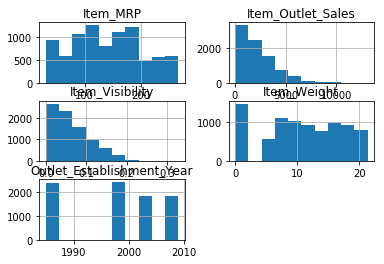

In [118]:
#data[data['Item_Weight']==-1000].hist()
data.hist()

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


признак, аналогичный идентификационным номерам перевожу в числа

In [120]:
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [121]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,0,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,2,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,0,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Nein,2,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,2,Supermarket Type1,994.7052


признак идентификатора удаляю

In [122]:
data_dum = pd.get_dummies(data.drop('Item_Identifier', inplace=False, axis=1))
data_dum.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Nein,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,3735.1380,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,2,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,2097.2700,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,2,732.3800,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,2,994.7052,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [123]:
data_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 45 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Outlet_Location_Type               8523 non-null int32
Item_Outlet_Sales                  8523 non-null float64
Item_Fat_Content_LF                8523 non-null uint8
Item_Fat_Content_Low Fat           8523 non-null uint8
Item_Fat_Content_Regular           8523 non-null uint8
Item_Fat_Content_low fat           8523 non-null uint8
Item_Fat_Content_reg               8523 non-null uint8
Item_Type_Baking Goods             8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_

проверяем корреляционную зависимость признаков и в частности целевого признака

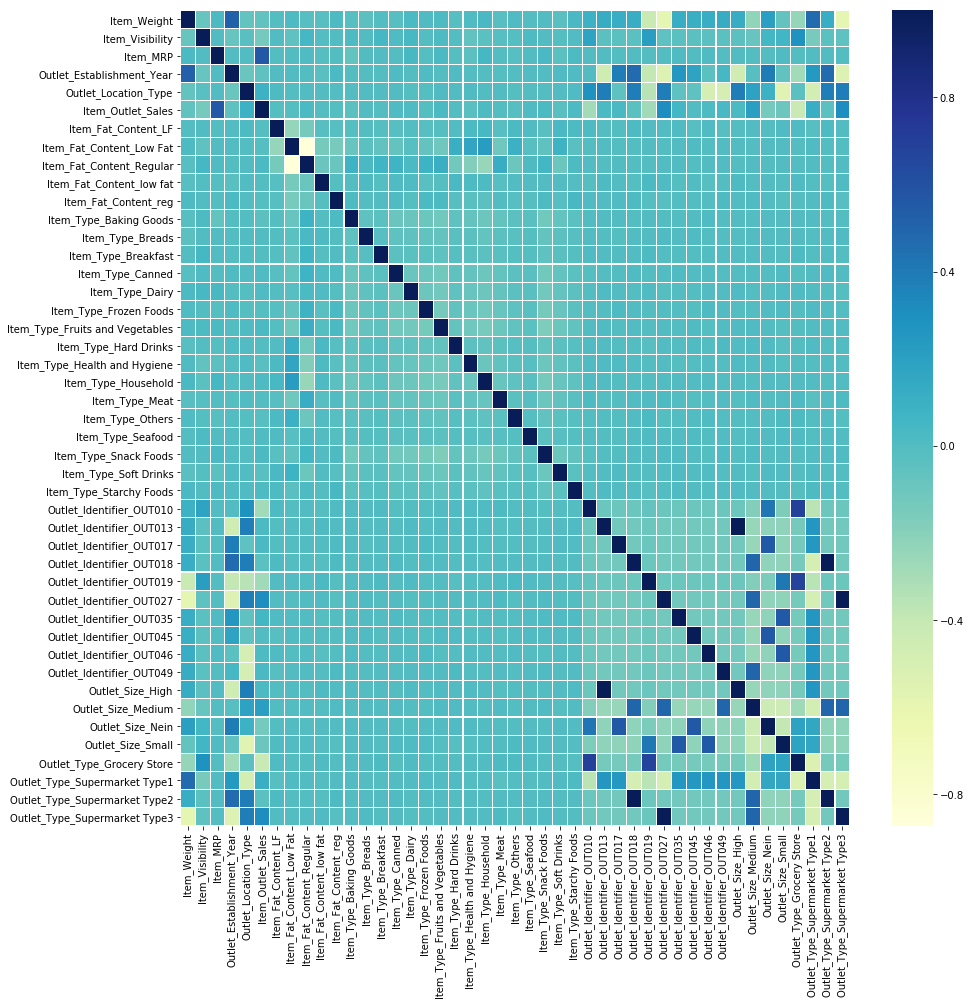

In [124]:
corrmat = data_dum.corr()

import seaborn as sns  

f, ax = plt.subplots(figsize =(15, 15))

sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Видим что на целевой признак Item_Outlet_Sales влияет ограниченное количество исходных

In [125]:
data_dum.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Nein,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,3735.1380,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,2,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,2097.2700,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,2,732.3800,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,2,994.7052,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [126]:
data_dum.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Nein,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,1.112871,2181.288914,0.037076,0.597090,0.338965,0.013141,...,0.109117,0.109117,0.109351,0.327702,0.282764,0.280183,0.127068,0.654347,0.108882,0.109703
std,6.431899,0.051598,62.275067,8.371760,0.812757,1706.499616,0.188960,0.490512,0.473386,0.113885,...,0.311804,0.311804,0.312098,0.469403,0.450369,0.449115,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,31.290000,1985.000000,0.000000,33.290000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.650000,0.026989,93.826500,1987.000000,0.000000,834.247400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.053931,143.012800,1999.000000,1.000000,1794.331000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,2.000000,3101.296400,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,2.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


делим данные на тестовые и тренировочные и применяем алг случайный лес

In [127]:
from sklearn.model_selection import train_test_split


In [128]:
X_train, X_test, y_train, y_test = train_test_split(data_dum.drop('Item_Outlet_Sales', inplace=False, axis=1), data_dum['Item_Outlet_Sales'], test_size=0.3)


In [129]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

reg_data = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
reg_data.fit(X_train, y_train)   

y_pr=reg_data.predict(X_test)
y_pr_tr=reg_data.predict(X_train)

In [131]:
reg_data.score(X_test, y_test)

0.5943353420239401

In [132]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_data, X_train, y_train, cv=10)
scores

array([0.61187537, 0.62308466, 0.59742346, 0.58945532, 0.65033998,
       0.54014835, 0.58955549, 0.60102755, 0.58598187, 0.58547376])

In [133]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_data, X_test, y_test, cv=10)
scores

array([0.54693571, 0.56009364, 0.58571642, 0.64261226, 0.60315567,
       0.63102889, 0.58652878, 0.64766103, 0.50778132, 0.59561947])

In [134]:
print(mean_squared_error(y_test, y_pr))
print(r2_score(y_test, y_pr))

1228110.6467514837
0.5943353420239401


Полученные показатели точности не очень высоки. Возможно  по причине большого количетва исх признаков. Проверим степень влияния признаков на результат и попробуем отобрать небольшое количество с сильным влиянием

In [135]:
print(reg_data.feature_importances_)

[3.32951162e-02 2.31473426e-02 5.50685360e-01 2.47519335e-02
 1.51541126e-03 4.60575790e-05 2.55567655e-03 1.70232061e-03
 0.00000000e+00 0.00000000e+00 4.06918466e-04 1.77126321e-05
 0.00000000e+00 1.50337313e-04 8.59450121e-04 3.53738525e-04
 1.17450719e-03 2.46157332e-05 7.00692108e-05 7.25116594e-04
 1.22372916e-04 0.00000000e+00 0.00000000e+00 5.79096452e-04
 1.41825908e-04 3.22224503e-05 1.90410588e-02 2.00552834e-04
 6.04236654e-04 3.53634053e-03 1.32089600e-02 5.73241538e-02
 4.34520954e-04 1.35671217e-03 1.08328742e-03 4.75267382e-04
 2.22887254e-04 1.35981302e-03 8.58013365e-04 1.01580827e-03
 1.92082829e-01 1.95626857e-02 2.27449018e-03 4.30011807e-02]


признаков достаточно много и попробуем отобрать автоматически несколько лучших. Цель автоматического отбора в том, чтобы после разворачивания dummies категорийных признаков и риска получения огромного кол производных признаков, невручную отсортировывать и оставлять лучшие.

In [136]:
ssort=reg_data.feature_importances_
ssort.sort()
ssort=ssort[-7:]
ssort=ssort.min()
ssort

0.023147342614255183

создаем список индексов признаков, влияние которых хуже, чем n-лучших (n значение не указываю, т.к. "играл" количеством. Можно задать в 3й строке предыдущего блока с кодом)

In [137]:
a=0
col_del=[]
for i in reg_data.feature_importances_:
    if i<ssort:
        #print(ssort,a,i)
        col_del.append(a)
    a+=1
print(col_del)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42]


In [138]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 7051 to 411
Data columns (total 44 columns):
Item_Weight                        5966 non-null float64
Item_Visibility                    5966 non-null float64
Item_MRP                           5966 non-null float64
Outlet_Establishment_Year          5966 non-null int64
Outlet_Location_Type               5966 non-null int32
Item_Fat_Content_LF                5966 non-null uint8
Item_Fat_Content_Low Fat           5966 non-null uint8
Item_Fat_Content_Regular           5966 non-null uint8
Item_Fat_Content_low fat           5966 non-null uint8
Item_Fat_Content_reg               5966 non-null uint8
Item_Type_Baking Goods             5966 non-null uint8
Item_Type_Breads                   5966 non-null uint8
Item_Type_Breakfast                5966 non-null uint8
Item_Type_Canned                   5966 non-null uint8
Item_Type_Dairy                    5966 non-null uint8
Item_Type_Frozen Foods             5966 non-null uint8
Item_

удаляем худшие по влиянию на целевой признаки

In [139]:
X_train.drop(X_train.columns[col_del], axis='columns',inplace=True)
X_test.drop(X_test.columns[col_del], axis='columns',inplace=True)

In [140]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier_OUT027,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
7051,11.60,0.038512,57.7272,2004,0,0,0
7783,0.00,0.046959,101.3016,1985,1,0,1
3765,5.51,0.034467,96.7726,2004,0,0,0
5788,7.52,0.055213,129.5994,1999,0,0,0
8334,13.15,0.020699,86.3566,1987,0,0,0


In [141]:
reg_data = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
reg_data.fit(X_train, y_train)   

y_pr=reg_data.predict(X_test)
y_pr_tr=reg_data.predict(X_train)

In [142]:
reg_data.score(X_test, y_test)

0.5952221451269557

полученный результат незначительно улучшил предыдущий, но плюс в том, что это было достигнуто просто за счет сокращения количества исх признаков. Комментрий - пока задумался сделать, на основании кода выше с подбором лучших параметров и оценкой результата, автоматический подбор количества признаков по точности модели. Просто потому что я ленивый перебирать это руками и мне это интересно. Полагаю есть смысл все это облечь в функцию. 

In [143]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_data, X_train, y_train, cv=10)
scores

array([0.60951793, 0.62233032, 0.59931078, 0.5816286 , 0.64790406,
       0.53921316, 0.58903353, 0.5996153 , 0.58645281, 0.58566884])

In [144]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_data, X_test, y_test, cv=10)
scores

array([0.54819672, 0.56757699, 0.58117504, 0.63395928, 0.60388809,
       0.62597764, 0.58007215, 0.65014712, 0.50613277, 0.60258705])

показатели точности на разных частях данных нестабильны

In [145]:
print(mean_squared_error(y_test, y_pr))
print(r2_score(y_test, y_pr))

1225425.9358431697
0.5952221451269557


попробуем подбор параметров алгоритма

In [146]:
from sklearn.model_selection import GridSearchCV

In [149]:
k_est = list(range(1, 20))
k_dept = list(range(1, 10))
k_leaf = list(range(1, 10))

In [150]:
param_grid = dict(n_estimators=k_est,max_depth=k_dept,min_samples_leaf=k_leaf)

In [151]:
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)

In [152]:
grid.fit(X_train, y_train)

C:\Users\karasev.vf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0026640097300211587
std_fit_time : 0.00024172370211632607
mean_score_time : 0.0006685256958007812
std_score_time : 0.0002361919217775249
param_max_depth : 1
param_min_samples_leaf : 1
param_n_estimators : 1
params : {'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 1}
split0_test_score : 0.23246439104279948
split1_test_score : 0.2396847343283065
split2_test_score : 0.24721159497347667
mean_test_score : 0.23978566228132775
std_test_score : 0.0060206914116181145
rank_test_score : 1532
split0_train_score : 0.24769706589744278
split1_train_score : 0.2415589861527476
split2_train_score : 0.23819443339591606
mean_train_score : 0.24248349514870216
std_train_score : 0.003934127923480938


C:\Users\karasev.vf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\karasev.vf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\karasev.vf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.

In [154]:
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.23978566 0.24388465 0.24700398 ... 0.57987288 0.58232106 0.58282461]


In [155]:
len(test_scores)

1539

In [156]:
print(grid.best_params_)

{'max_depth': 6, 'min_samples_leaf': 7, 'n_estimators': 17}


проверим на оптимальных параметрах

In [157]:
from sklearn.ensemble import RandomForestRegressor


m_rf = RandomForestRegressor(n_estimators=17, max_depth=6, min_samples_leaf=7, max_features=0.5, n_jobs=-1)
m_rf.fit(X_train, y_train)   

y_rf=m_rf.predict(X_test)
y_pr_rf_trayn=m_rf.predict(X_train)


m_rf.score(X_test, y_test)

0.5900328239045047

In [158]:
print(reg_data.feature_importances_)

[0.04050275 0.03159117 0.55464673 0.03748779 0.05239921 0.22353134
 0.05984101]


--------------------

улучшения качества модели за счет подбора парметров не получилось. Предположительные пути решения - поиск другой модели

In [159]:
data_dum.to_csv("data_dum.csv")